The dataset provided contains information on the US honey consumption, including the average price of honey over the years. We aim to explore and analyze this data to identify the trends and patterns in the average honey price and gain insights into its fluctuation over time

In [ ]:
# Dataset - US_honey.csv

# Dataset description -

**Column Names**       -        **Column explanation**

Unnamed  -            This column is giving us only index

state -               Represents the states name of US

Colonies_number -     Colonies of bee in the states

yield_per_colony -    Total count the bee inside a colony

production -          Production of honey

stocks -              Total stock of the honey in state

average_price -       Average value of the honey per year in different state

value_of_production - Value of honey production per year

year -                 Year of productions


In [ ]:
# step-1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# step-2 Load the dataset

df=pd.read_csv("US_honey_dataset.csv")

df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [49]:
# step-3 EDA - Exploratry data analysis ( Data cleaning step)

In [50]:
# Remove/drop the un-named columns

df=df.drop(["Unnamed: 0"],axis=1)

df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [51]:
# Check the information about columns in your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [52]:
# Check how many states are there

df["state"].unique()  # It will give you a list of unique values

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [53]:
# Check total no of states

df["state"].nunique()   # It will give you a number of total unique values

44

In [54]:
# Check how many different years data i am having

df["year"].nunique()

# 2000 - 1995 = 27

27

In [55]:
# Data cleaning step

# Check for null values

df.isnull().sum()

# No null values are there in our dataset

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [56]:
# Check for duplicate values

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [57]:
df.duplicated().sum()

# No duplicate data in there in our dataset

0

In [58]:
# Lest say you are having duplicate values ?
# Drop the duplicate record

#df.drop_duplicates()

# 1) Which states are rarely contributing to honey production for the last 27 years?

In [59]:
data=df["state"].value_counts()

data

state
Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: count, dtype: int64

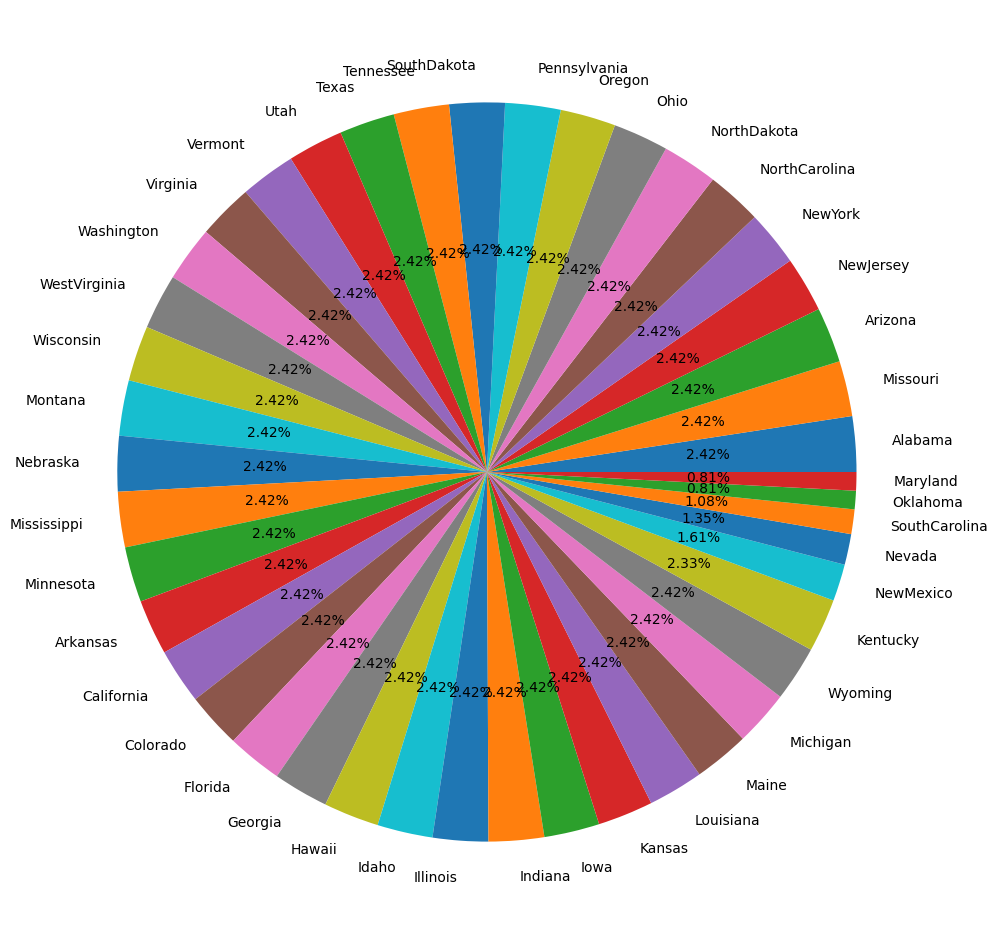

In [60]:
# Draw a pie chart to compare values
plt.figure(figsize=(12,12))

plt.pie(data.values , labels=data.index ,autopct="%0.2f%%" )
plt.show()

In [61]:
# Least Honey producing states from last 27 years are

# Maryland - 9
# Oklahoma - 9

# 2) Which are the top 5 Honey producing states in the US ?


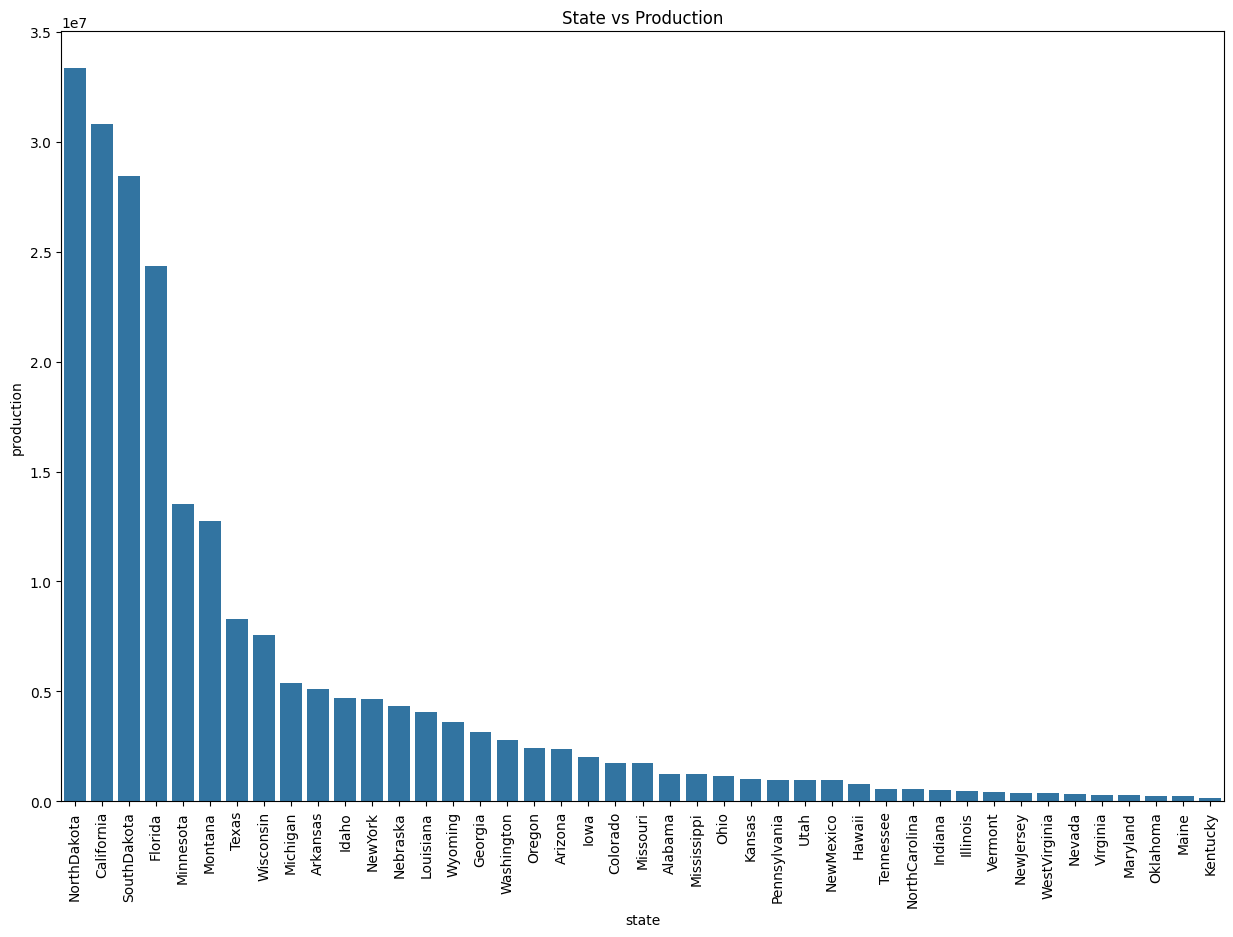

In [62]:
plt.figure(figsize=(15,10))

sns.barplot(x=data1["state"],y=data1["production"])
plt.xticks(rotation=90)    # if you want to rotate the state name on x axis
plt.title("State vs Production")
plt.show()

In [63]:
# Compare states by value of honey production

new_value=df.groupby("state").sum().reset_index()
new_value

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000,54216
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000,54216
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
6,Georgia,1917000,1354,57426000,9932000,3260.68,145945000,54216
7,Hawaii,296000,2802,15420000,3508000,3719.13,49888000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216
9,Illinois,236000,1562,9864000,4957000,5842.43,36782000,54216


In [64]:
# Sort the values in descending order so High values of proDuction can come at top

new_df=new_value.sort_values("production",ascending=False)   # by default it will sort in ascending thatswhy we are passing ascending=False
new_df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
28,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
34,SouthDakota,6639000,1950,355726000,218634000,2891.51,619095000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
21,Montana,3725000,2148,197173000,91240000,2961.17,406563000,54216
18,Minnesota,3498000,1885,176581000,51908000,2887.89,310462000,54216
36,Texas,2876000,1921,129441000,41022000,2965.74,284720000,54216
17,Michigan,2168000,1753,101063000,58401000,3311.97,217841000,54216
42,Wisconsin,1698000,1896,99909000,59166000,3410.87,176442000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216


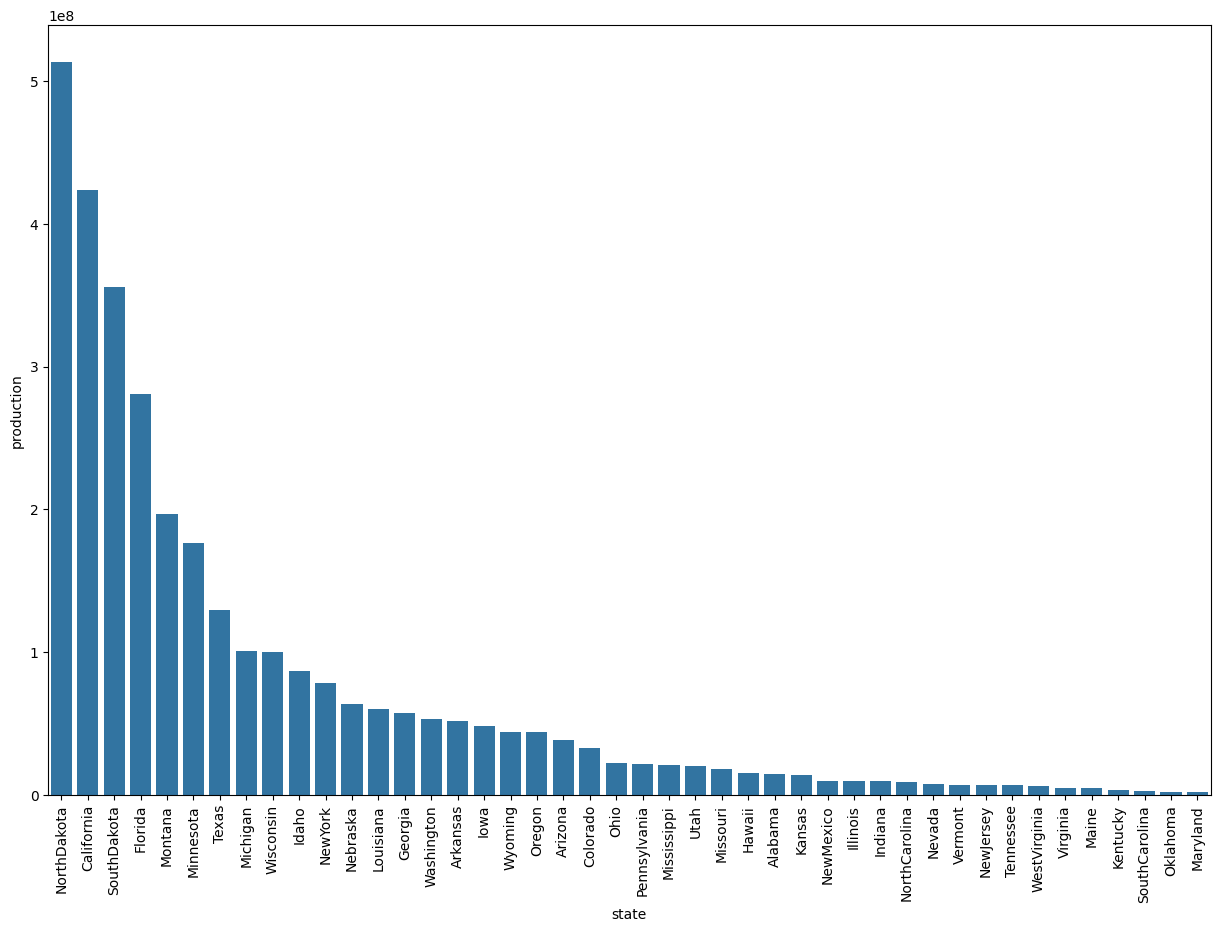

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df["state"],y=new_df["production"])
plt.xticks(rotation=90)
plt.show()

In [66]:
# Conclusion
# Top 5 honey producing states are
'''
1-NorthDakota
2-California
3-SouthDakota
4-Florida
5-Montana
'''


'\n1-NorthDakota\n2-California\n3-SouthDakota\n4-Florida\n5-Montana\n'

#3) What is the Change in mean Average price of Honey from 1995 to 2021?

In [67]:
# Find the average price of all states for all years from 1995 to 2021

df2=df.groupby("year").mean(["average_price"]).reset_index()

df2

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


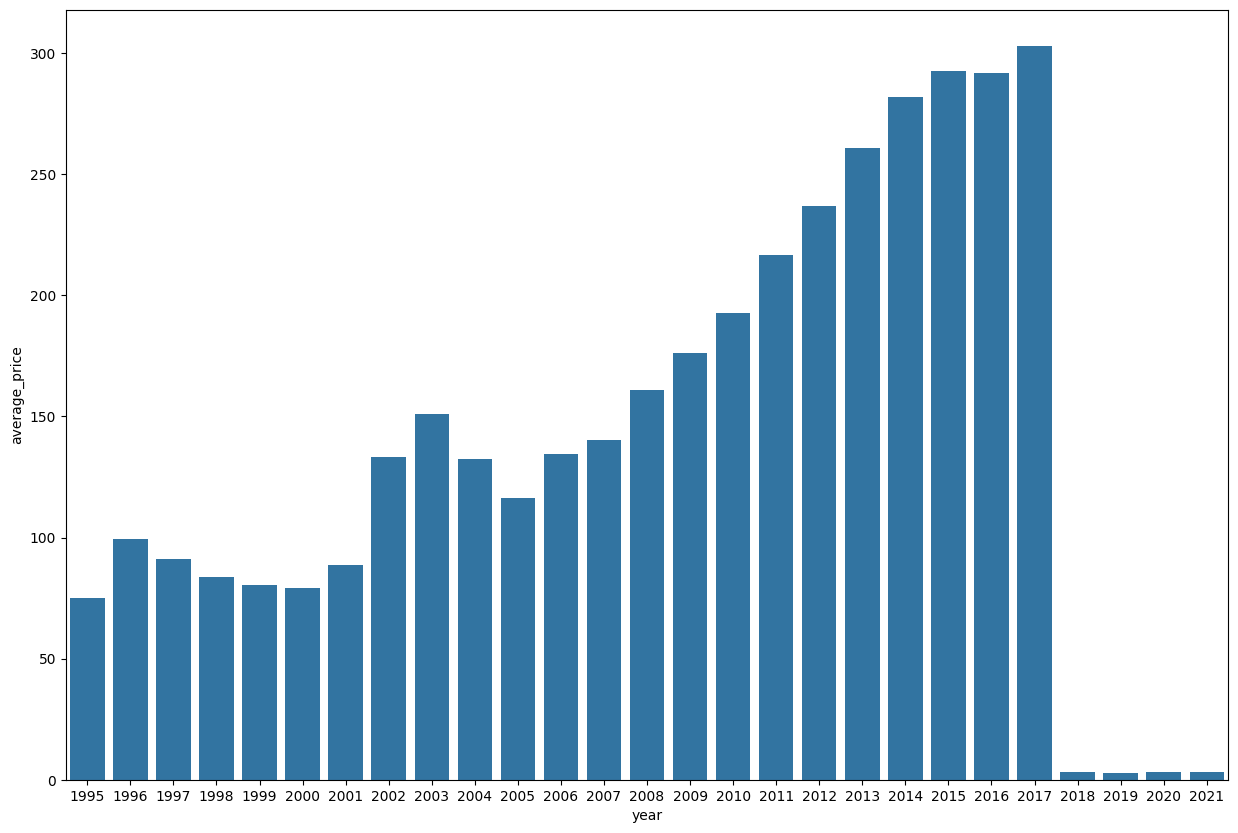

In [68]:
# Lest draw a barplot

plt.figure(figsize=(15,10))

sns.barplot(x=df2["year"],y=df2["average_price"])
plt.show()

In [69]:
# Average price was highest in year - 2017 (302.775000) and Lowest in the year 2019 (2.925500)
# After 2017 from 2018 to 2021 Price falls suddenly and remains constant

# 4) Which was the year when production of Honey in wholeUS was the highest?

In [70]:
# We have to find in which year the production was highest in USA

df3=df.groupby("year").sum()["production"].reset_index()
df3

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


In [71]:
new_df=df3.sort_values("production",ascending=False)   # by default it will sort in ascending thatswhy we are passing ascending=False
new_df

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000
2,1997,191176000
6,2001,185403000
9,2004,182379000
8,2003,180741000
10,2005,173857000


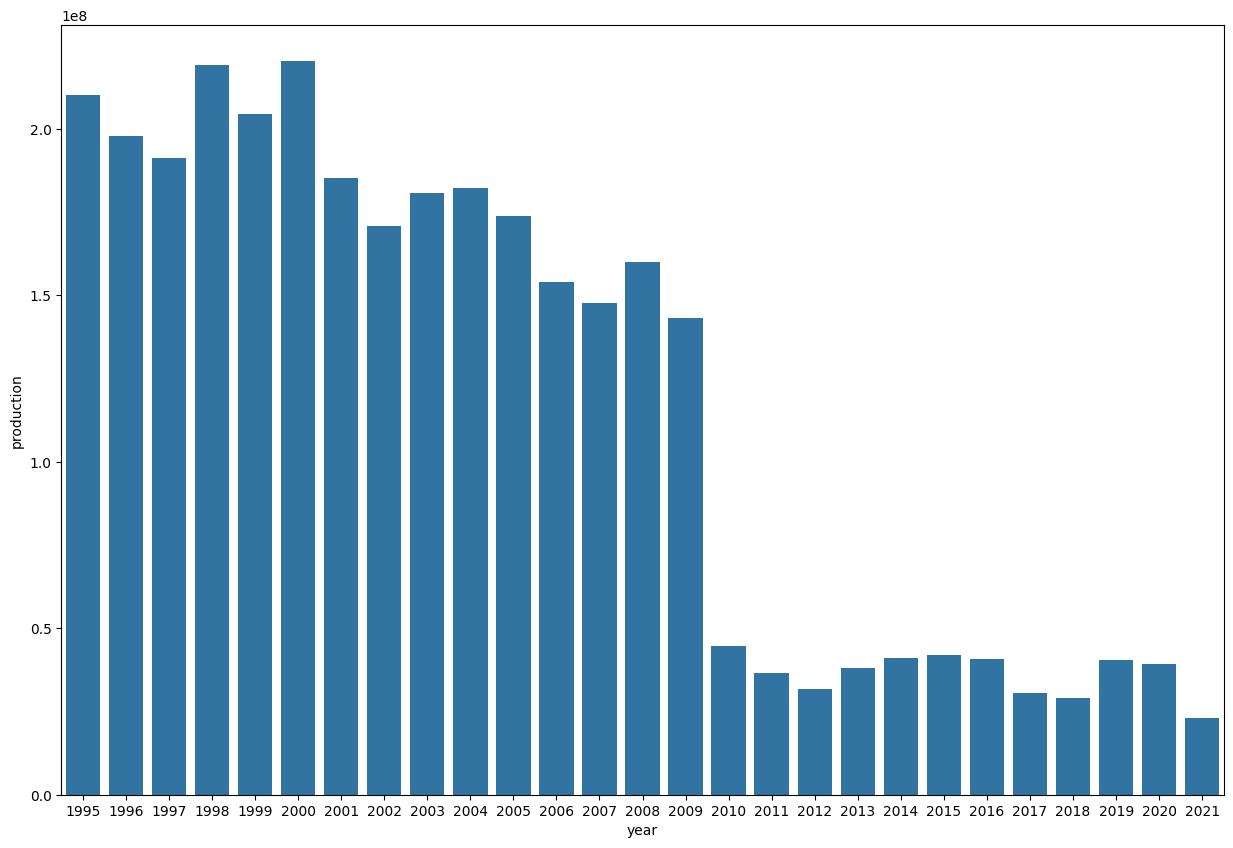

In [72]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df["year"],y=new_df["production"])
plt.show()

In [73]:
# conclusion -
'''

In year 2000 the production of honey was highest in USA
After 2000 in year 1998 the production was second highest in USA

'''

'\n\nIn year 2000 the production of honey was highest in USA\nAfter 2000 in year 1998 the production was second highest in USA\n\n'

# 5) From the above inference we get the production was highest in the year 2000, now let infer which state was having highest contribution in that year

In [74]:
# Find which state was having highest production in year 2000

In [75]:
# step-1 Find all states data for year 2000

In [76]:
data=df[df["year"]==2000]   # Print data of all states of year 2000
data

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
223,Georgia,55000,57,3135000,376000,63.0,1975000,2000
224,Hawaii,7000,112,784000,125000,81.0,635000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
226,Illinois,8000,61,488000,146000,117.0,571000,2000


In [77]:
data=data.sort_values("production",ascending=False)   # by default it will sort in ascending thatswhy we are passing ascending=False
data

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000


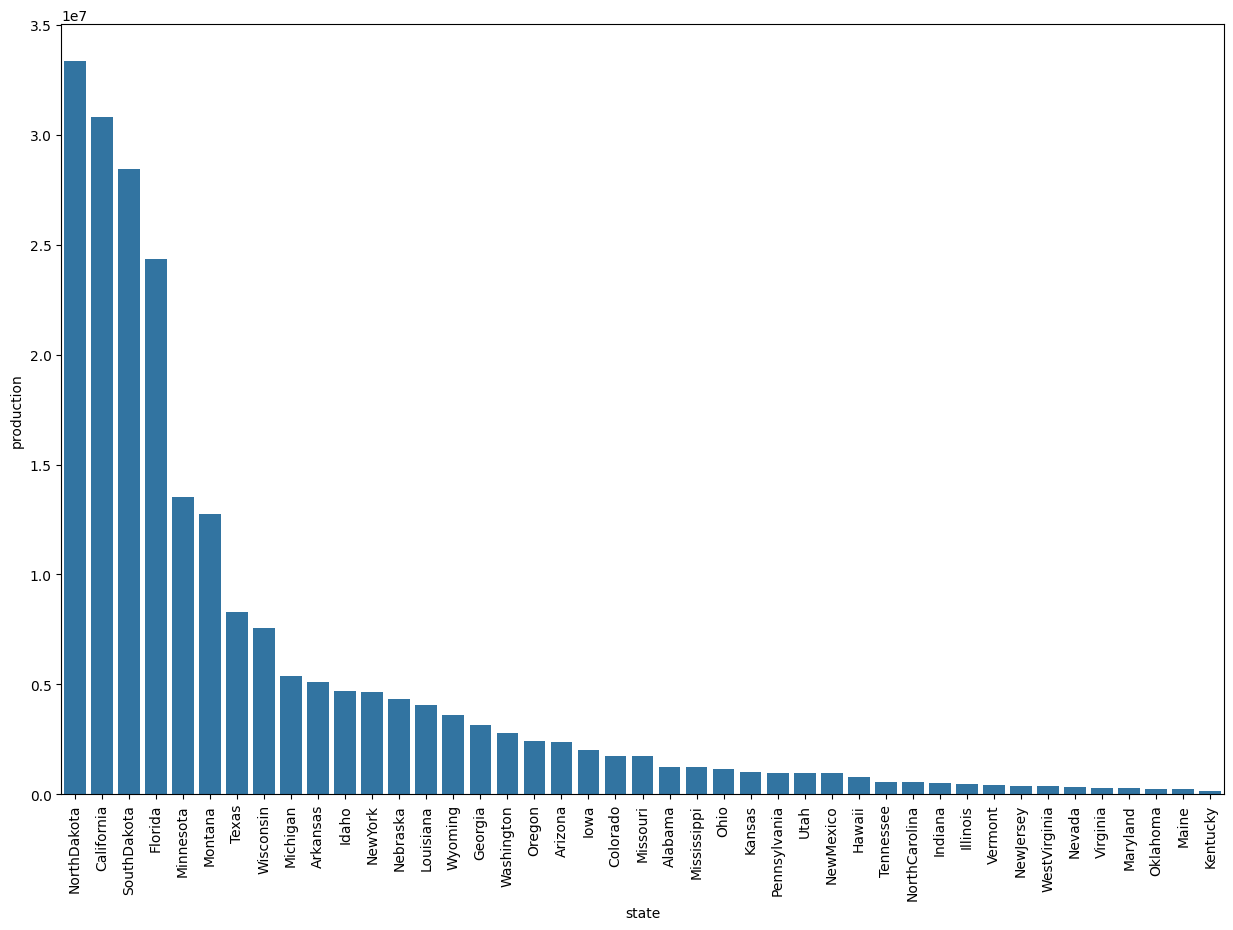

In [78]:
plt.figure(figsize=(15,10))
sns.barplot(x=data["state"],y=data["production"])
plt.xticks(rotation=90)
plt.show()

In [79]:
# conclusion
'''
North Dakota is the state having highest production in year 2000
'''
print("33350000 - 3 crore 33 lakh 50 thousand")

33350000 - 3 crore 33 lakh 50 thousand


# 6) Which states have the highest no. of colonies in the year 2000?

In [80]:
data=data.sort_values("colonies_number",ascending=False)   # by default it will sort in ascending thatswhy we are passing ascending=False
data

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
220,California,440000,70,30800000,11396000,58.0,17864000,2000
245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000


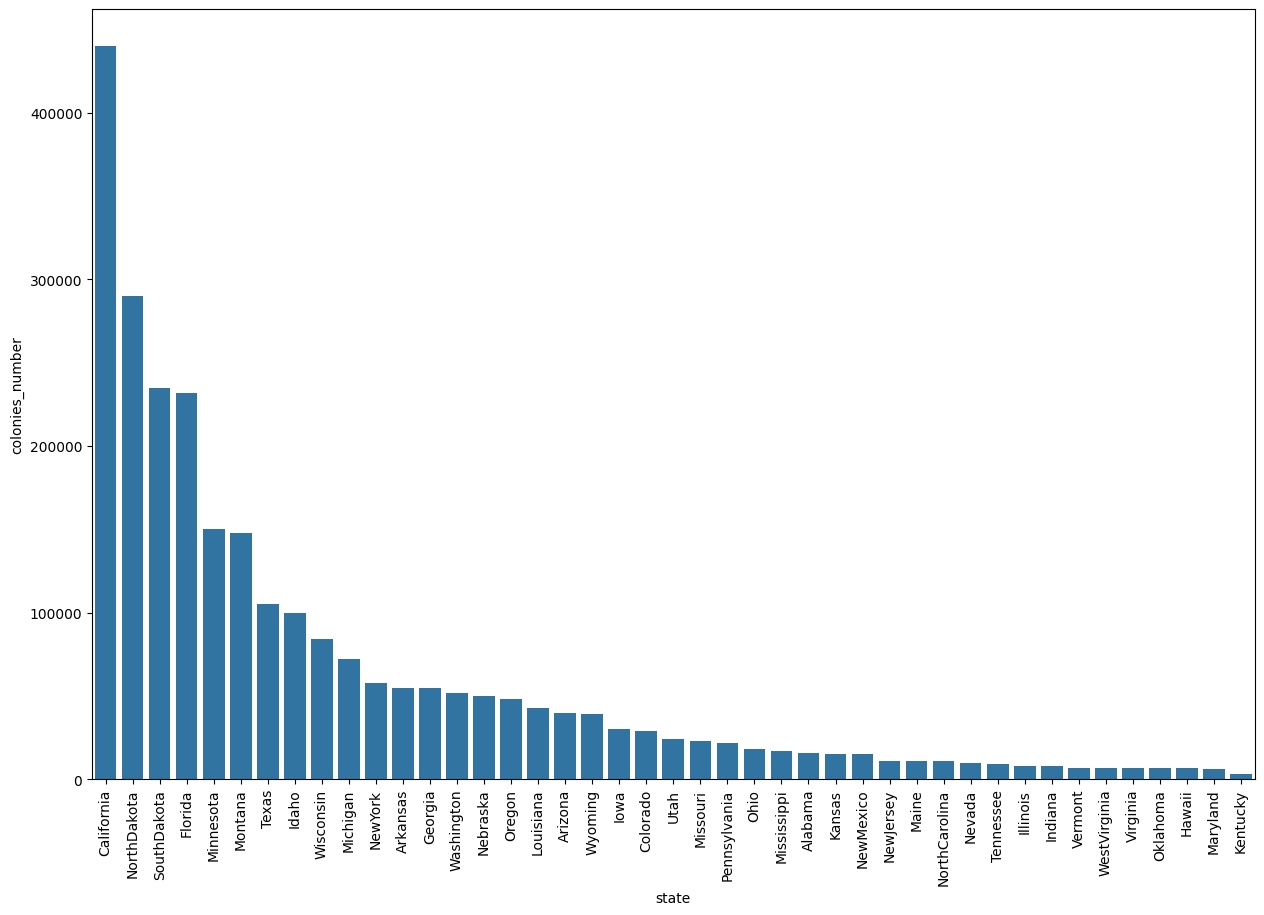

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(x=data["state"],y=data["colonies_number"])
plt.xticks(rotation=90)
plt.show()

In [83]:
# conclusion
'''
California is having the highest no of colonies in year 2000

After californis North dakota is the state having highest no of colonies
'''

print("THANK YOU")

THANK YOU
